# TITANIC SURVIVAL PREDICTION


In [4]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#reading data from the csv file
data=pd.read_csv('Titanictrain.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# describing the for making analysis easy
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.shape

(891, 12)

# Destribution of the numarical values

<Axes: xlabel='Survived', ylabel='count'>

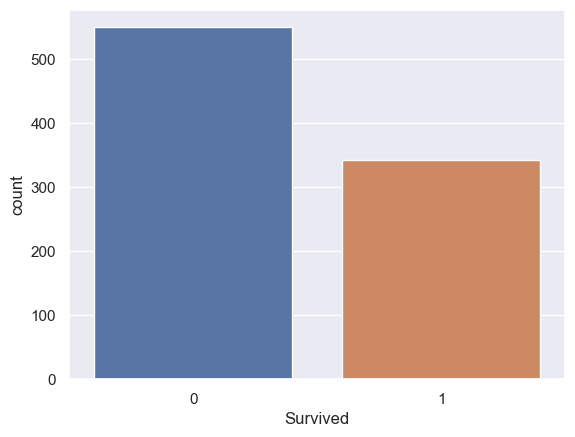

In [9]:
# Ploting the graph for the survide values
sns.set()
sns.countplot(x="Survived",data=data)

In [10]:
#primary data analysis
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\jayesh\AppData\Local\Temp\ipykernel_23172\1017158616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap="RdYlGn")


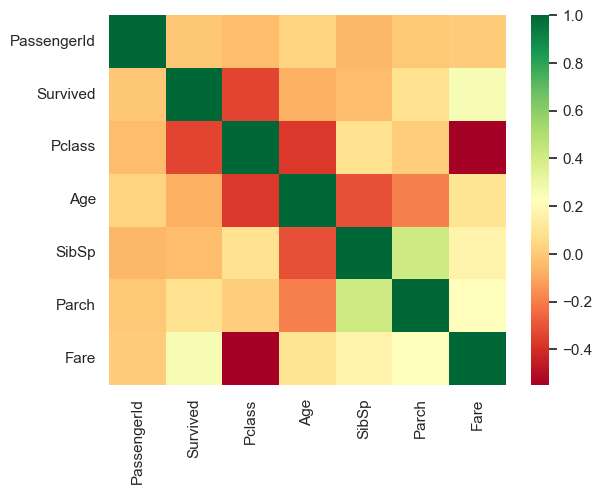

In [11]:
#ploting the heat map
sns.heatmap(data.corr(),cmap="RdYlGn")
plt.show()

<Axes: xlabel='Sex'>

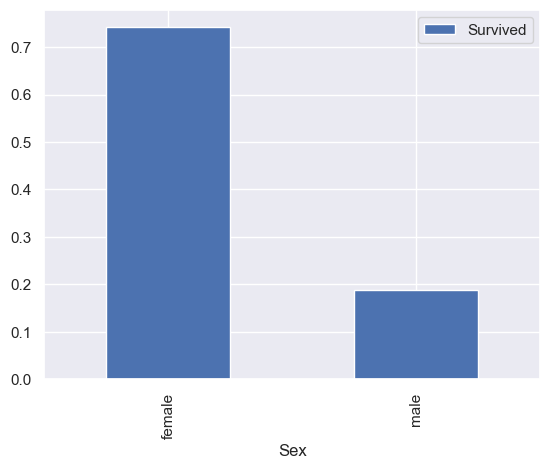

In [12]:
#ploting the graph as per the survived data by there sex
survived_by_sex = data[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

# Preparing Dataset

In [13]:
# making the test and train data for the classifcation process
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(data,data[["Survived","Pclass","Sex"]]):
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]

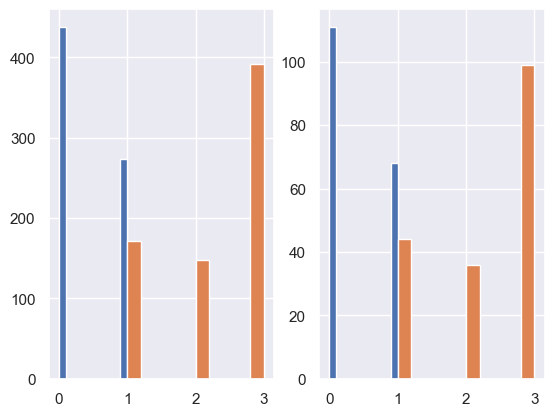

In [14]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()




plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()



plt.show()

In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 890 to 710
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        imputer =SimpleImputer(strategy='mean')
        X['Age']= imputer.fit_transform(X[['Age']])
        return X

In [17]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names=["C","S",'Q','N']
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        matrix =encoder.fit_transform(X[['Sex']]).toarray()
        column_names =["Female","Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        return X

In [18]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,x):
        return x.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [19]:
#making pipeline to make operation easy on the train and test data
from sklearn.pipeline import Pipeline
pipeline=Pipeline([("ageimputer",AgeImputer()),
                  ("featureencoder",FeatureEncoder()),
                  ("featuredropper",FeatureDropper())])

In [20]:
strat_train_set =pipeline.fit_transform(strat_train_set)

In [21]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
890,891,0,3,32.0,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
458,459,1,2,50.0,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
795,796,0,2,39.0,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
516,517,1,2,34.0,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
269,270,1,1,35.0,0,0,135.6333,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,1,1,35.0,1,0,83.4750,0.0,0.0,1.0,1.0,0.0
285,286,0,3,33.0,0,0,8.6625,1.0,0.0,0.0,0.0,1.0
765,766,1,1,51.0,1,0,77.9583,0.0,0.0,1.0,1.0,0.0
280,281,0,3,65.0,0,0,7.7500,0.0,1.0,0.0,0.0,1.0


In [22]:
from sklearn.preprocessing import StandardScaler

x= strat_train_set.drop(['Survived'],axis=1)
y= strat_train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()

# Preparing model for the classifiaction

In [23]:
#here we choose the Random forest classifier for classifiaction
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
param_grid =[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [24]:
final_clf=grid_search.best_estimator_

In [25]:
final_clf

RandomForestClassifier(max_depth=10)

In [26]:
strat_test_set =pipeline.fit_transform(strat_test_set)

In [27]:
x_test = strat_test_set.drop(['Survived'],axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
x_data_test= scaler.fit_transform(x)
y_data_test= y.to_numpy()

In [28]:
final_clf.score(x_data_test,y_data_test)

0.9620786516853933

In [29]:
data_final = pipeline.fit_transform(data)

In [30]:
data_final

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [31]:
x_final = data_final.drop(['Survived'],axis=1)
y_final = data_final['Survived']

scaler = StandardScaler()
x_data_final= scaler.fit_transform(x_final)
y_data_final= y_final.to_numpy()

In [32]:
prod_clf = RandomForestClassifier()
param_grid =[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [33]:
prod_final_clf =grid_search.best_estimator_

In [34]:
titanic_test_data =pd.read_csv("Titanictest.csv")

In [35]:
final_test_data =pipeline.fit_transform(titanic_test_data)

In [36]:
x_final_test =final_test_data
x_final_test =x_final_test.fillna(method="ffill")

scaler = StandardScaler()
x_data_final_test = scaler.fit_transform(x_final_test)

In [37]:
predictions = prod_final_clf.predict(x_data_final_test)

In [38]:
#saving the prediction value into new csv fiel name as prediction
final_df =pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Suevived"]=predictions
final_df.to_csv('predictions.csv',index=False)